In [1]:
'''
Author: Dhruv B Kakadiya

'''


'\nAuthor: Dhruv B Kakadiya\n\n'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np

In [17]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
# only for apples
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [18]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
#normalizing the input
X = (inputs-mu) / sigma
X = np.hstack((np.ones((targets.size,1)),X))
print(X.shape)

(15, 4)


Linear Regression Model (from scratch)

The weights and biases can also be represented as matrices, initialized with random values. The first row of w and the first element of b are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

In [19]:
# Weights and biases
rg = np.random.default_rng(12)
w = rg.random((1, 4))
print(w)

[[0.25082446 0.94675294 0.18932038 0.17929141]]


In [20]:
# MSE loss function
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [23]:
# Define the model
def model(x,w):
    return x @ w.T

# Compute error
preds = model(X,w)
cost_initial = mse(preds, targets)
print("before regression cost is : ", cost_initial)

before regression cost is :  6961.124339563164


In [26]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    history = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, w)
        diff = h - y
        delta = (learning_rate / targets.size) * (X.T@diff)
        new_w = w - delta.T
        w = new_w
        history[i] = mse(h, y)
    return (history, w)

In [27]:
import matplotlib.pyplot as plt
n_iters = 200
learning_rate = 0.01

initial_cost = mse(model(X, w),targets)

print("Initial cost is: ", initial_cost, "\n")

(history, optimal_params) = gradient_descent(X, targets, w, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", history[-1])

Initial cost is:  6961.124339563164 

Optimal parameters are: 
 [[66.02435426 -5.02777326 20.51719239 12.68658774]] 

Final cost is:  [121.48701344]


Adjust Weights using Gradints

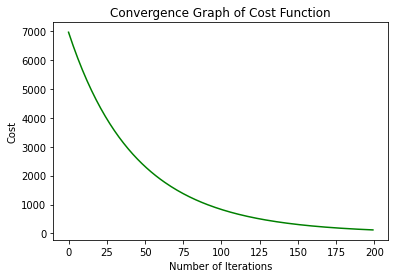

In [30]:
import matplotlib.pyplot as plt


plt.plot(range(len(history)), history, 'g')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [31]:
# Calculate error
preds = model(X, optimal_params)
cost_final = mse(preds, targets)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n", targets)

Prediction:
 [[ 46.64832016]
 [ 74.63682394]
 [101.27252623]
 [ 12.2643147 ]
 [ 95.29978595]
 [ 46.64832016]
 [ 74.63682394]
 [101.27252623]
 [ 12.2643147 ]
 [ 95.29978595]
 [ 46.64832016]
 [ 74.63682394]
 [101.27252623]
 [ 12.2643147 ]
 [ 95.29978595]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [32]:
print("Cost after linear regression: ", cost_final)
print("Cost reduction : {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression:  119.25682332821566
Cost reduction : 98.28681664755756 %
